# Wires Analysis - January 2025

In [37]:
import random 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import helper_functions as help

In [38]:
# Generate data
wires = [random.randint(50, 500000) for _ in range(10)]
outliers = [600000, 3000000, 1200000, 1300000, 2500000]
amounts = wires + outliers
wire_type = random.choices(['domestic', 'international'], k = 15)
direction = random.choices(['outgoing', 'incoming'], k = 15)
recipient = random.choices(['Chris', 'Aliese', 'Jack', 'Johnathan', 'Lauren',
                            'Lucas', 'Charlotte'], k = 15)
sender = random.choices(['Chris', 'Aliese', 'Jack', 'Johnathan', 'Lauren', 
                         'Lucas', 'Charlotte'], k = 15)
accounts = help.account_number_generator(12) + help.general_ledger_generator(3)
dates = help.generate_random_dates(15, datetime(2025, 1, 1), datetime(2025, 1, 31))


data = {
       'date':dates,
       'account number':accounts,
       'direction':direction,
       'amount':amounts,
       'type':wire_type,
       'recipient':recipient,
       'sender':sender
        }

df = pd.DataFrame(data)

In [39]:
df.head()

,date,account number,direction,amount,type,recipient,sender
0,2025-01-14,8729922634830071,outgoing,373919,domestic,Chris,Charlotte
1,2025-01-29,4737869421198792,outgoing,55072,international,Charlotte,Chris
2,2025-01-12,5226749942361505,outgoing,268400,international,Jack,Aliese
3,2025-01-14,8888968182740570,outgoing,267123,international,Lauren,Chris
4,2025-01-16,9591584564509169,incoming,351652,international,Lauren,Charlotte


In [40]:
# Filter out accounts with less than 16 digits 
df_filtered = help.filter_out_general_ledgers(df, 'account number')

In [41]:
# Identify outliers
outliers = help.identify_outliers(df_filtered, 'amount')

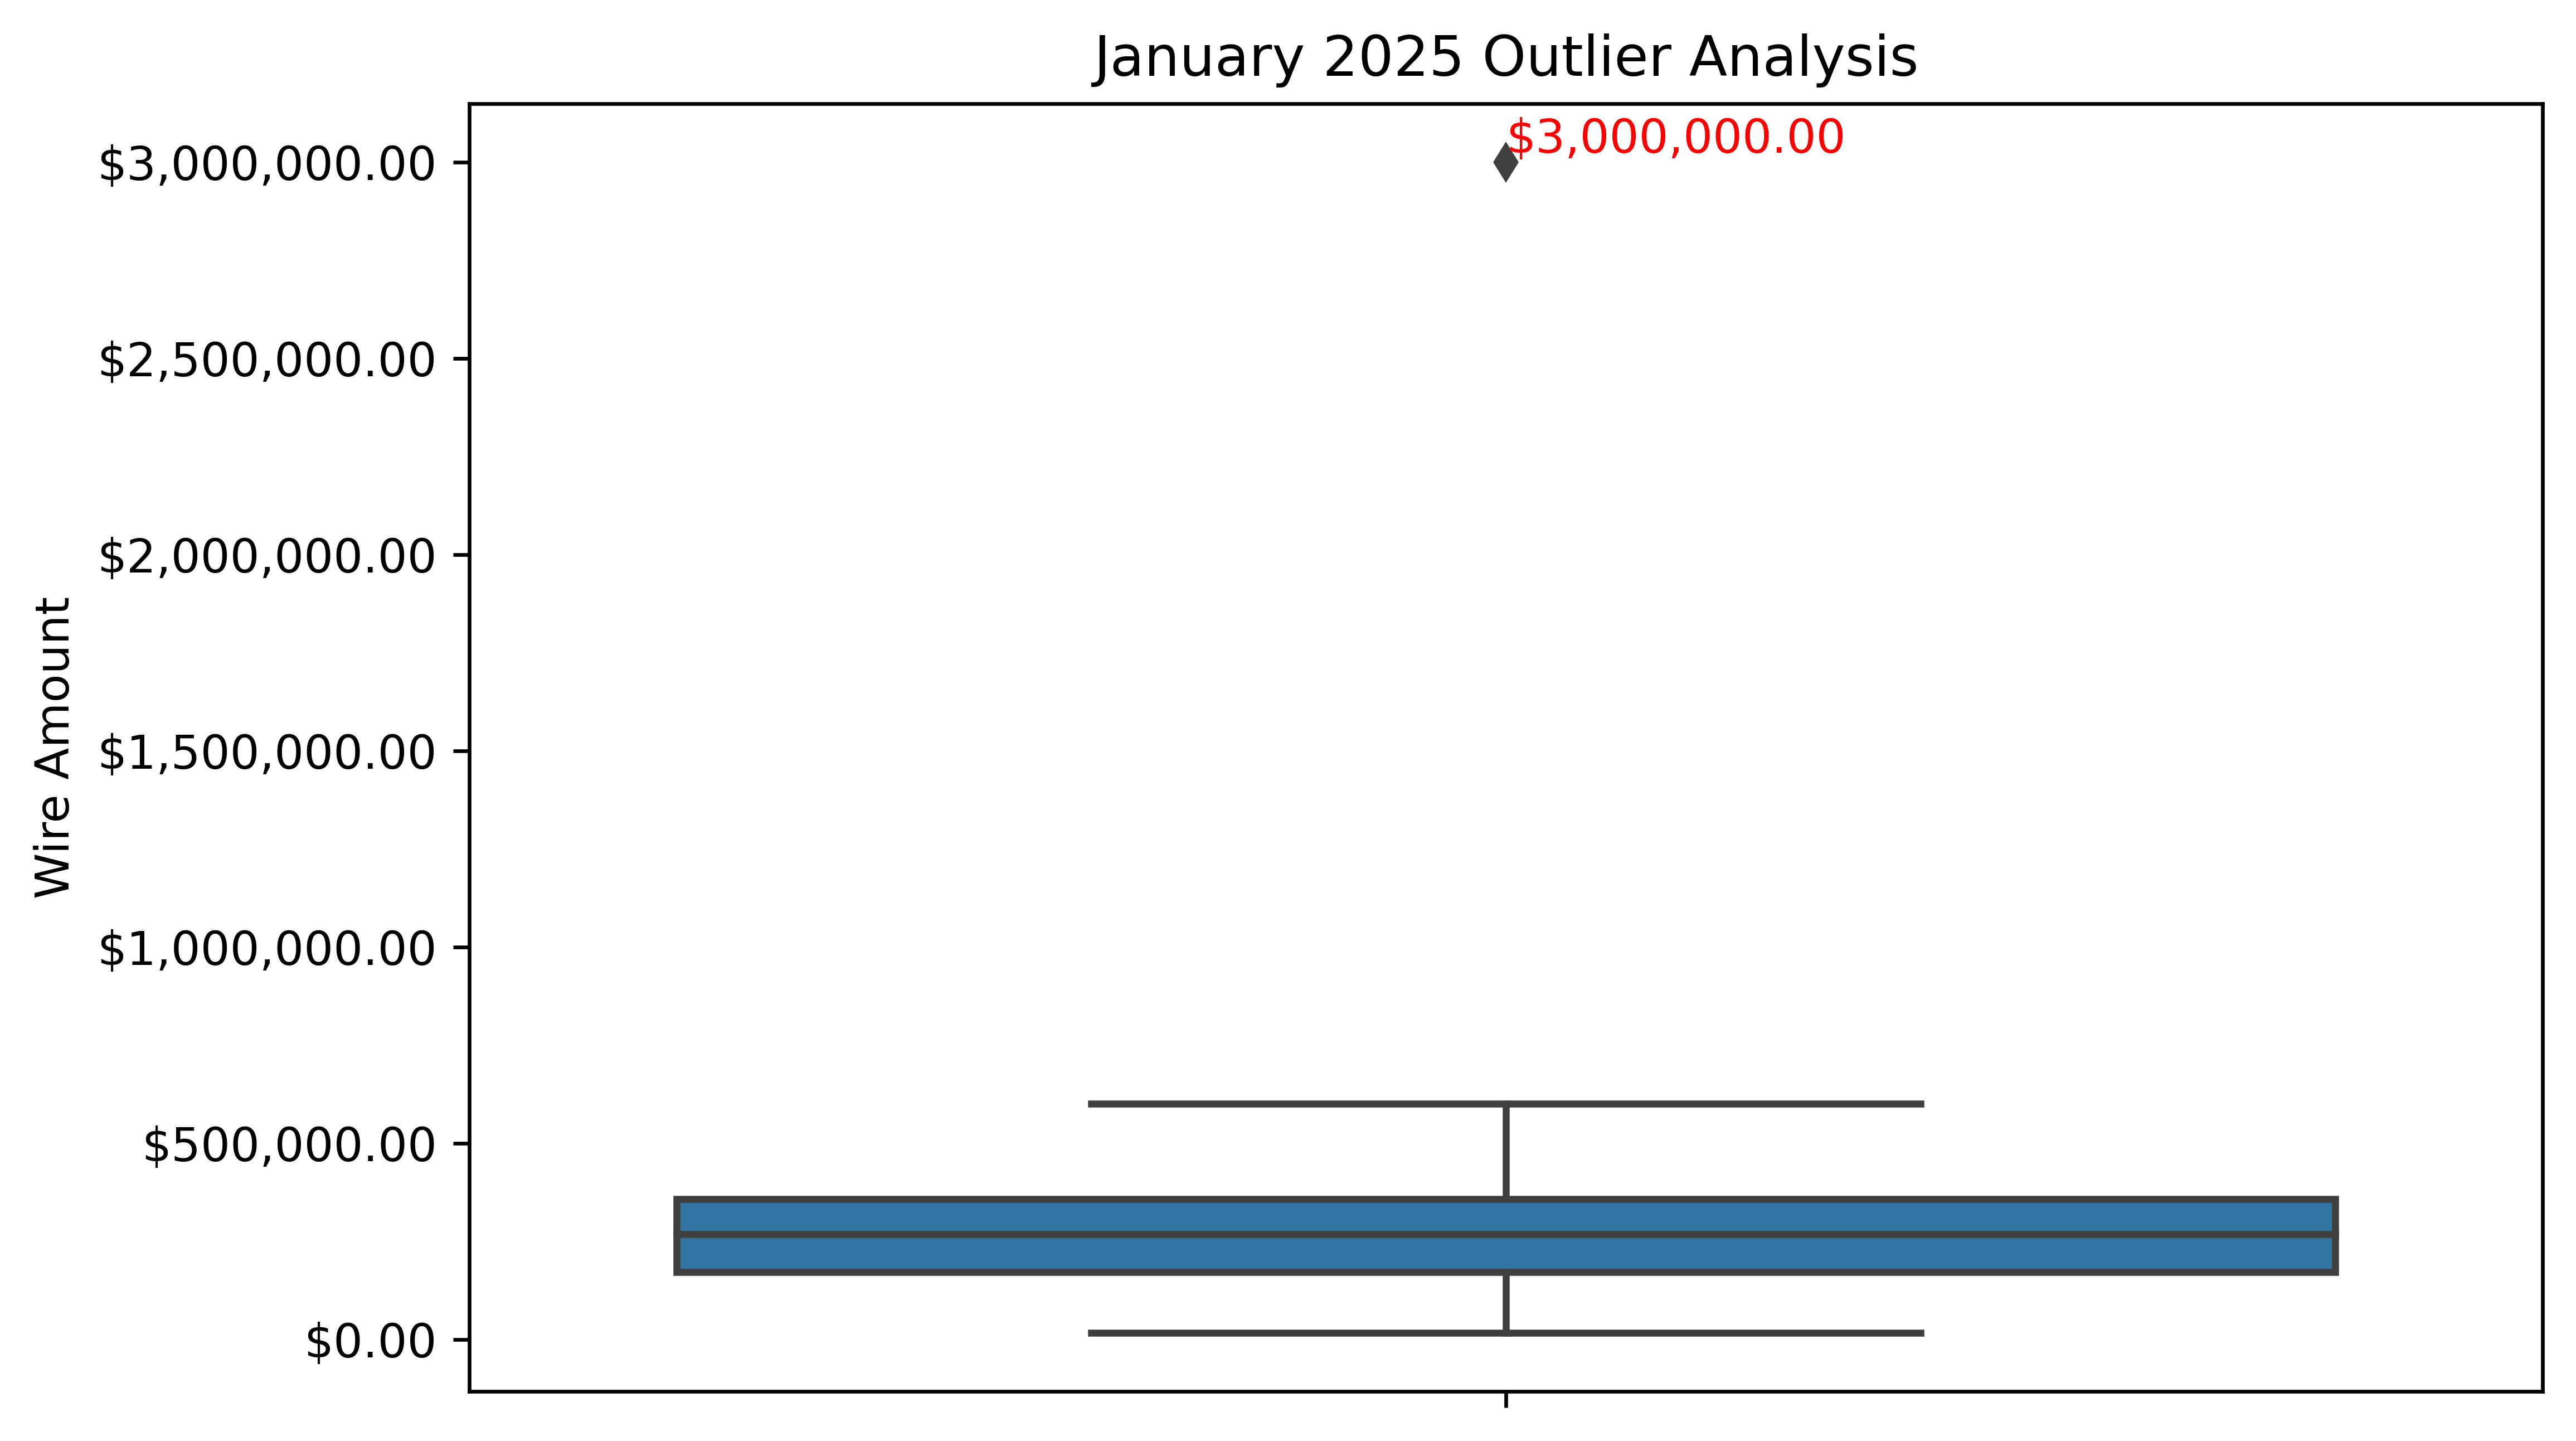

In [42]:
# Create boxplot 
plt.figure(figsize=(8, 5), dpi=600)
ax = sns.boxplot(data=df_filtered, y='amount')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.ylabel('Wire Amount')
plt.title('January 2025 Outlier Analysis')

# Label outliers 
for i in outliers.index:
    amount = df_filtered.loc[i, 'amount']
    plt.text(0, amount, f"${amount:,.2f}", ha='left', va='bottom', fontsize=10, color='red')
plt.show()

In [43]:
outlier_amounts = list(outliers['amount'])
df_final = df_filtered[~df_filtered['amount'].isin(outlier_amounts)]

In [44]:
group_sums = df_final.groupby(['direction', 'type'])['amount'].sum().to_frame().reset_index()
group_sums.columns = ['Direction', 'Type', 'Sum']
group_sums['Sum'] = group_sums['Sum'].apply(lambda x: f'${x:,.2f}')

outliers_copy = outliers.copy()
outliers_copy['amount'] = outliers['amount'].apply(lambda x: f'${x:,.2f}')

In [45]:
group_sums

,Direction,Type,Sum
0,incoming,domestic,"$1,138,392.00"
1,incoming,international,"$506,917.00"
2,outgoing,domestic,"$550,902.00"
3,outgoing,international,"$607,311.00"


In [46]:
outliers_copy

,date,account number,direction,amount,type,recipient,sender
11,2025-01-17,6277252674470621,incoming,"$3,000,000.00",domestic,Charlotte,Aliese
